In [20]:
import pandas as pd

url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url)

df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [21]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
floors_df = df['floors'].value_counts().to_frame()

floors_df.rename(columns={'floors': 'Number of Houses'}, inplace=True)

floors_df

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


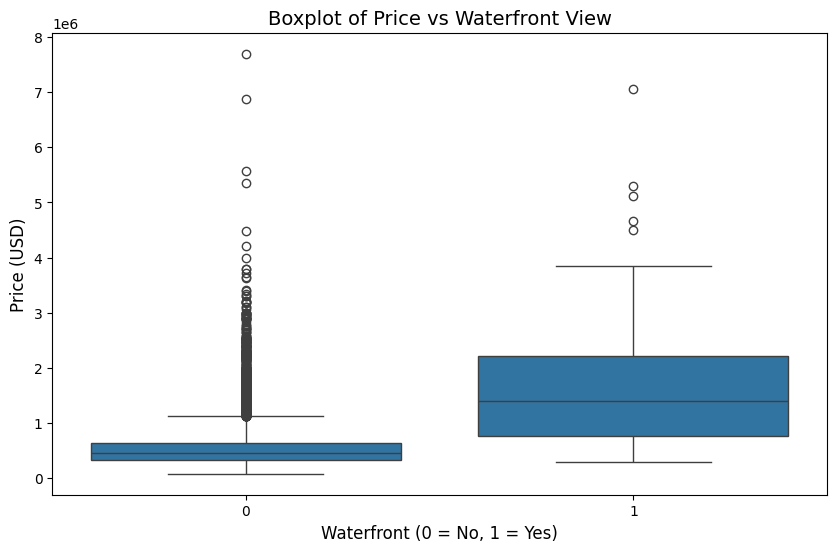

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="waterfront", y="price", data=df)

plt.title("Boxplot of Price vs Waterfront View", fontsize=14)
plt.xlabel("Waterfront (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

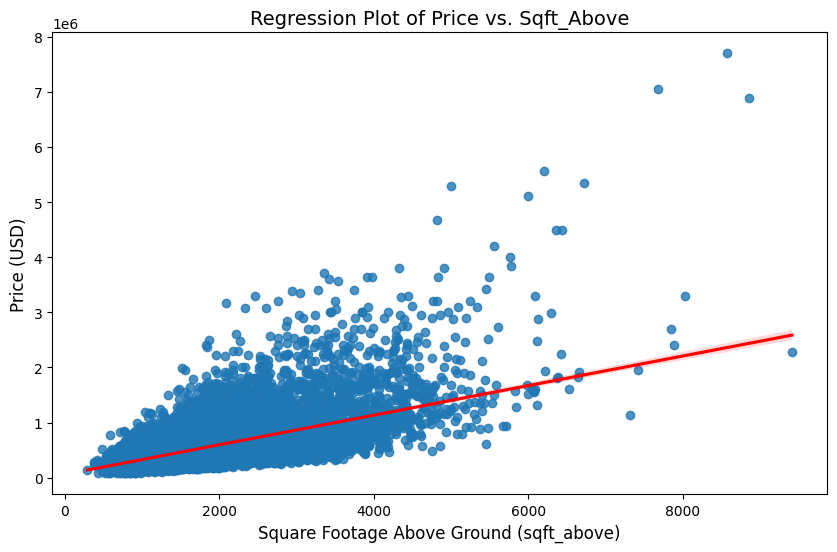

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})

plt.title("Regression Plot of Price vs. Sqft_Above", fontsize=14)
plt.xlabel("Square Footage Above Ground (sqft_above)", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

X = df[['sqft_living']]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)

r2 = lm.score(X, Y)

print("R² value:", r2)

R² value: 0.4928532179037931


In [28]:
features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"
]

df_clean = df[features + ["price"]].dropna()

X = df_clean[features]
Y = df_clean["price"]

lm_multi = LinearRegression()
lm_multi.fit(X, Y)

r2_multi = lm_multi.score(X, Y)
print("R² value for the multiple linear regression model:", r2_multi)

R² value for the multiple linear regression model: 0.6578409661299078


In [29]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

pipeline.fit(X, Y)

r2_pipeline = pipeline.score(X, Y)
print("R² value for Polynomial Regression Pipeline:", r2_pipeline)


R² value for Polynomial Regression Pipeline: 0.7513824681113679


In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

ridge_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge(alpha=0.1))
])

ridge_pipeline.fit(X_train, Y_train)

r2_ridge = ridge_pipeline.score(X_test, Y_test)
print("R² value for Ridge Regression on test data:", r2_ridge)

R² value for Ridge Regression on test data: 0.7050829564721012


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, Y_train)

r2_ridge_poly = ridge_model.score(X_test_poly, Y_test)
print("R² value for Ridge Regression with 2nd-degree Polynomial:", r2_ridge_poly)


R² value for Ridge Regression with 2nd-degree Polynomial: 0.7050829564721012
